# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning 

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering 

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores 

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print("Null in dataset") #Checking if there is a missing value in the dataset.
print("---------------------")
print(df.isnull().sum())
#There is no missing value in the data.

Null in dataset
---------------------
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
#Encoding categorical features, sex, smoker, region.
df['sex'] = pd.Series(np.where(df['sex'].values == "male", 1, 0),
          df.index)
df['smoker'] = pd.Series(np.where(df['smoker'].values == "yes", 1, 0),
          df.index)

# Using OneHotEncoder for the 'region' feature.
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
df = create_dummies(df,'region')
df = df.drop('region', axis=1)
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


<AxesSubplot:>

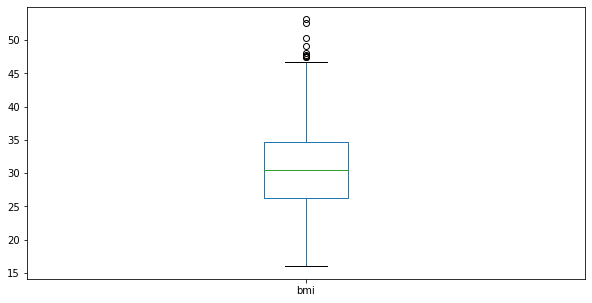

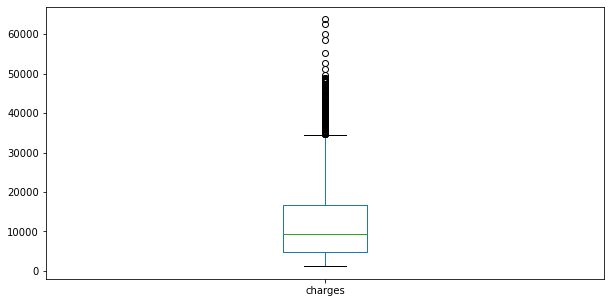

In [5]:
plt.rcParams["figure.figsize"] = [10.0,5.0] #Detecting outliers for 'bmi' and 'charges' features.
df.plot(kind = "box", x = 'age', y='bmi')
df.plot(kind = "box", x = 'age', y='charges')

In [6]:
Q1=df.quantile(0.25)#Removing outliers for 'bmi' and 'charges' features.
Q3=df.quantile(0.75)
cols = ['charges','bmi']
IQR=Q3-Q1
df=df[~((df[cols]<(Q1-1.5*IQR)) | (df[cols]>(Q3+1.5*IQR))).any(axis=1)]

<AxesSubplot:>

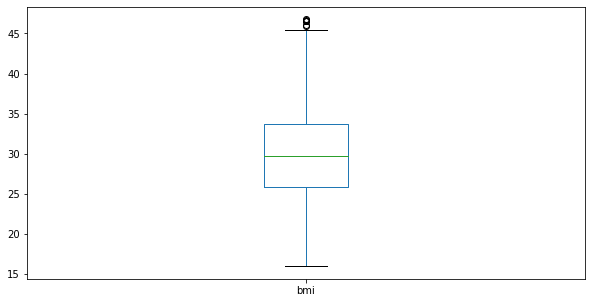

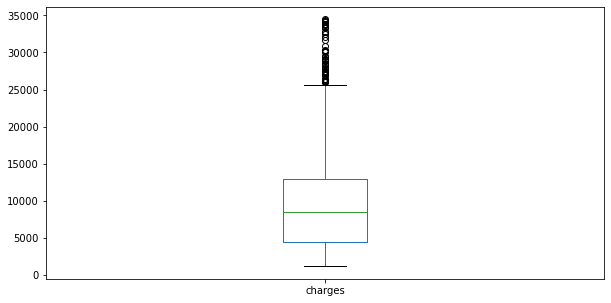

In [7]:
plt.rcParams["figure.figsize"] = [10.0,5.0] # Plotting after outlier removal.
df.plot(kind = "box", x = 'age', y='bmi')
df.plot(kind = "box", x = 'age', y='charges')

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled = pd.DataFrame(scaled_df,columns=df.columns)
scaled.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.421407,-0.975980,-0.357841,-0.892872,2.764946,0.957834,-0.573156,-0.586062,-0.582190,1.760584
1,-1.492543,1.024611,0.643111,-0.070327,-0.361671,-1.133608,-0.573156,-0.586062,1.717653,-0.567993
2,-0.781184,1.024611,0.511811,1.574764,-0.361671,-0.757808,-0.573156,-0.586062,1.717653,-0.567993
3,-0.425504,1.024611,-1.243693,-0.892872,-0.361671,1.661386,-0.573156,1.706305,-0.582190,-0.567993
4,-0.496640,1.024611,-0.190732,-0.892872,-0.361671,-0.838186,-0.573156,1.706305,-0.582190,-0.567993


In [9]:
from sklearn.cluster import KMeans

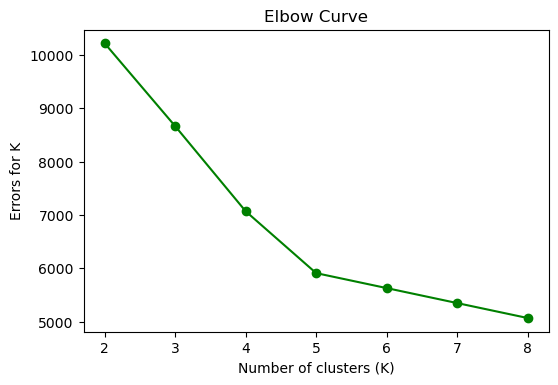

In [10]:
#Plotting elbow curve to choose best K value.
errors = []
for k in range(2,9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(scaled)
    errors.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), errors, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Errors for K")
plt.title("Elbow Curve")
plt.show()
# According to the elbow curve after K= 3, we have the first breaking point. But the error is too high, so optimal K value might 
# be K=5. Because after K =5, error decreased too slowly and it doesnt' make sense to increase the cluster number since we have 10
# features.

In [11]:
from sklearn.metrics import silhouette_score

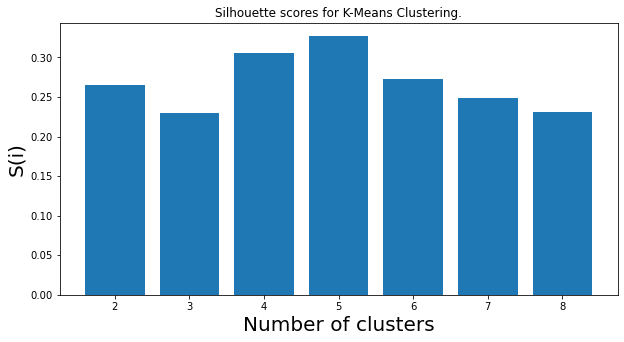

In [12]:
silhouette_scores1 = []
for k in range(2,9):
    agc = KMeans(n_clusters =k)
    silhouette_scores1.append(silhouette_score(scaled,agc.fit_predict(scaled)))
plt.bar(range(2,9), silhouette_scores1)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.title("Silhouette scores for K-Means Clustering.")
plt.show()
# As we seen from the silhouette scores for k between (2,9), K = 5 is the best choice. From the elbow curve K = 5 was an
# optimal choice. So we can consider K as 5 in this sitauation that satisfies both measures.

In [13]:
# Creating the model.
kmm = KMeans(n_clusters=5)
clusters = kmm.fit_predict(scaled)
cluster_label = kmm.labels_
df['KMEANS_LABELS'] = cluster_label
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,KMEANS_LABELS
0,19,0,27.900,0,1,16884.92400,0,0,0,1,4
1,18,1,33.770,1,0,1725.55230,0,0,1,0,2
2,28,1,33.000,3,0,4449.46200,0,0,1,0,2
3,33,1,22.705,0,0,21984.47061,0,1,0,0,1
4,32,1,28.880,0,0,3866.85520,0,1,0,0,1


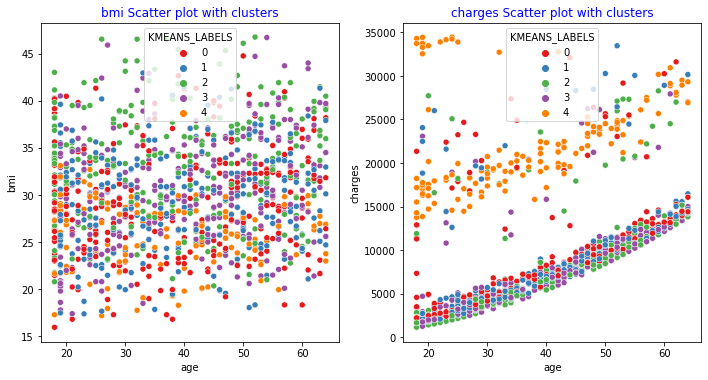

In [14]:
f=plt.figure(figsize=(20,20))
scatter_cols =['bmi','charges']
for i, col in enumerate(scatter_cols):
    ax=f.add_subplot(4,4,i+1)
    sns.scatterplot(x=df['age'],y=df[col],hue=df['KMEANS_LABELS'],palette='Set1')
    ax.set_title(col+" Scatter plot with clusters",color='blue')
    plt.ylabel(col)
f.tight_layout()
# Other variables are not continious, so they do not need to be used.

[Text(0.5, 1.0, 'K-Means Clustering')]

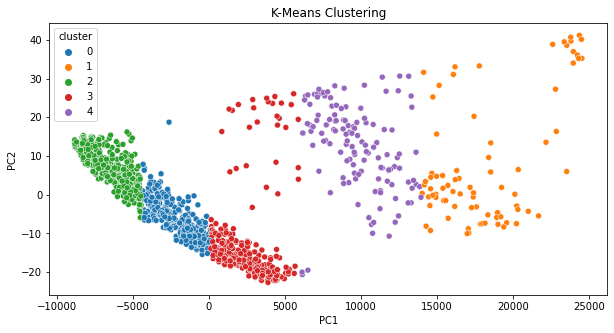

In [15]:
from sklearn.decomposition import PCA 
kmeans =KMeans(n_clusters=5).fit(df)
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(df),columns=['PC1','PC2']) 
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data).set(title='K-Means Clustering')

# There are 5 clusters and from the plot, seems like there are no divergent point so we can say that this model is good for dataset.
# Also, although some data points are too distant from others they still looks well-clustered.

In [16]:
df = df.drop('KMEANS_LABELS',axis = 'columns')
X = df[df.columns]

In [17]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

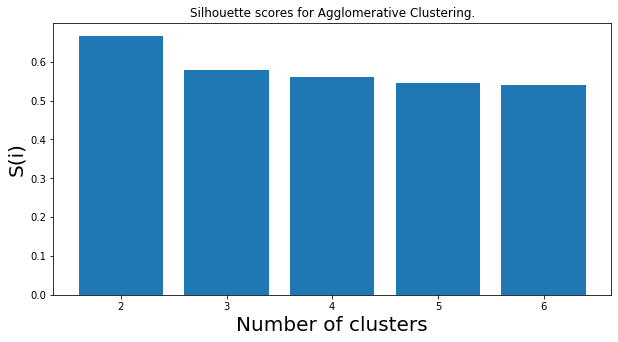

In [18]:
silhouette_scores = []
for k in range(2,7):
    agc = AgglomerativeClustering(n_clusters =k,
                             affinity = "euclidean",
                             linkage = "ward")
    silhouette_scores.append(silhouette_score(X,agc.fit_predict(X)))
plt.bar(range(2,7), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.title("Silhouette scores for Agglomerative Clustering.")
plt.show()
# As we seen from the silhouette scores for k between (2,7), K = 2 is the best choice.

In [19]:
#Agglomerative Clustering Algorithm 
hac = AgglomerativeClustering(n_clusters =2,
                             affinity = "euclidean",
                             linkage = "ward")
hac.fit(X)
clusters2 = hac.labels_
df.insert(df.columns.get_loc("age"), "AGC-Cluster", clusters2)
df.insert(df.columns.get_loc("AGC-Cluster"), "KM-Cluster", clusters)
df
# Latest version of the dataset.

,KM-Cluster,AGC-Cluster,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,4,1,19,0,27.900,0,1,16884.92400,0,0,0,1
1,2,0,18,1,33.770,1,0,1725.55230,0,0,1,0
2,2,0,28,1,33.000,3,0,4449.46200,0,0,1,0
3,1,1,33,1,22.705,0,0,21984.47061,0,1,0,0
4,1,0,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1,0,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,0,0,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,2,0,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,3,0,21,0,25.800,0,0,2007.94500,0,0,0,1


[Text(0.5, 1.0, 'Agglomerative Clustering')]

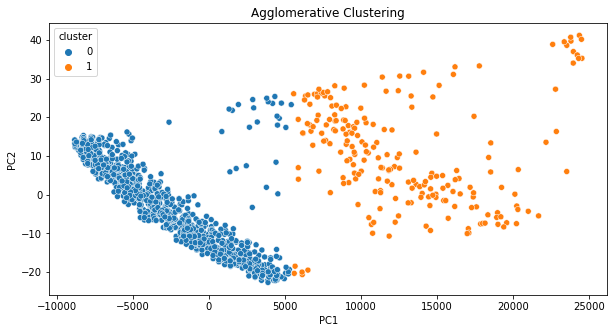

In [20]:
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(df),columns=['PC1','PC2']) 
pca_data['cluster'] = pd.Categorical(clusters2)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data).set(title='Agglomerative Clustering')
# So we can say that model clustered dataset well. After PC1 = 50000, there is kind of a vertical line that seperates clusters.